#  Part 1: Data Processing
Download the data set (accepted_2007_to_2018Q4.csv). Filter the data set for year 2015.
-	Show how you process and clean the data in Jupyter notebook.
-	Show simple analytics over the data.




In [3]:
import gc
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# load the downloaded csv file

df = pd.read_csv('accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv')

In [7]:
# take a peek at the data
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# take a look at df shape. There's around 2.26 mil data point with 151 columns. Let's see the column name
df.shape

(2260701, 151)

In [9]:
df.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'po

In [10]:
# the data is using 2.5gb memory. let's filter it for easier work
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [11]:
# looking at the data info in kaggle, the date column is issue_d. lets filter this to year 2015 only.
df.issue_d.value_counts()

Mar-2016    61992
Oct-2015    48631
May-2018    46311
Oct-2018    46305
Aug-2018    46079
            ...  
Aug-2007       74
Jul-2007       63
Sep-2008       57
Sep-2007       53
Jun-2007       24
Name: issue_d, Length: 139, dtype: int64

In [12]:
# we could split the issue_d column into month and year, and then filter. or we could just use string filtering here
# need to remove null value first in this column

df = df[~df['issue_d'].isna()]

df_2015 = df[df['issue_d'].str.contains('2015')].copy()

In [13]:
df_2015.shape

(421095, 151)

In [ ]:
# lets see the distribution

df_2015.issue_d.value_counts()

In [14]:
# garbage collection to free memory
del df
gc.collect()

97

In [15]:
# remove column with majority null data
df_2015.isnull().mean().round(4).mul(100).sort_values(ascending=False).head(50)

sec_app_num_rev_accts                         100.00
sec_app_mort_acc                              100.00
sec_app_collections_12_mths_ex_med            100.00
sec_app_chargeoff_within_12_mths              100.00
sec_app_open_act_il                           100.00
sec_app_revol_util                            100.00
sec_app_open_acc                              100.00
sec_app_inq_last_6mths                        100.00
sec_app_earliest_cr_line                      100.00
sec_app_fico_range_high                       100.00
sec_app_fico_range_low                        100.00
revol_bal_joint                               100.00
member_id                                     100.00
sec_app_mths_since_last_major_derog           100.00
desc                                           99.99
annual_inc_joint                               99.88
verification_status_joint                      99.88
dti_joint                                      99.88
orig_projected_additional_accrued_interest    

In [16]:
# remove columns with more than 70% null
df_2015 = df_2015.loc[:, df_2015.isnull().sum() < 0.7*df_2015.shape[0]]
df_2015.shape

(421095, 95)

In [17]:
# removed around 40 columns

df_2015.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,...,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N


In [18]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421095 entries, 0 to 421094
Data columns (total 95 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              421095 non-null  object 
 1   loan_amnt                       421095 non-null  float64
 2   funded_amnt                     421095 non-null  float64
 3   funded_amnt_inv                 421095 non-null  float64
 4   term                            421095 non-null  object 
 5   int_rate                        421095 non-null  float64
 6   installment                     421095 non-null  float64
 7   grade                           421095 non-null  object 
 8   sub_grade                       421095 non-null  object 
 9   emp_title                       397221 non-null  object 
 10  emp_length                      397278 non-null  object 
 11  home_ownership                  421095 non-null  object 
 12  annual_inc      

In [19]:
# remove non-numeric columns or convert to binary
# select object type column to filter

# obj_df = df.select_dtypes(include=['object']).copy()
df_2015.select_dtypes(include=['object']).head().T

,0,1,2,3,4
id,68407277,68355089,68341763,66310712,68476807
term,36 months,36 months,60 months,60 months,60 months
grade,C,C,B,C,F
sub_grade,C4,C1,B4,C5,F1
emp_title,leadman,Engineer,truck driver,Information Systems Officer,Contract Specialist
emp_length,10+ years,10+ years,10+ years,10+ years,3 years
home_ownership,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE
verification_status,Not Verified,Not Verified,Not Verified,Source Verified,Source Verified
issue_d,Dec-2015,Dec-2015,Dec-2015,Dec-2015,Dec-2015
loan_status,Fully Paid,Fully Paid,Fully Paid,Current,Fully Paid


In [20]:
# too many unique value will not provide significant data for mcahine learning model. lets remove those columns.
df_2015.select_dtypes(include=['object']).nunique()

id                      421095
term                         2
grade                        7
sub_grade                   35
emp_title               120812
emp_length                  11
home_ownership               4
verification_status          3
issue_d                     12
loan_status                  7
pymnt_plan                   2
url                     421095
purpose                     14
title                       27
zip_code                   914
addr_state                  49
earliest_cr_line           668
initial_list_status          2
last_pymnt_d                51
last_credit_pull_d          52
application_type             2
hardship_flag                2
disbursement_method          1
debt_settlement_flag         2
dtype: int64

In [22]:
# change datetime columns to proper format

date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
df_2015[date_cols] = df_2015[date_cols].apply(pd.to_datetime)
df_2015[date_cols].head()

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,2015-12-01,2003-08-01,2019-01-01,2019-03-01
1,2015-12-01,1999-12-01,2016-06-01,2019-03-01
2,2015-12-01,2000-08-01,2017-06-01,2019-03-01
3,2015-12-01,2008-09-01,2019-02-01,2019-03-01
4,2015-12-01,1998-06-01,2016-07-01,2018-03-01


In [23]:
# remove columns not much info can be extracted from these data

df_2015 = df_2015.drop(['emp_title', 'url', 'title', 'zip_code', 'addr_state'], axis=1)


In [24]:
df_2015.hardship_flag.value_counts()

N    421042
Y        53
Name: hardship_flag, dtype: int64

In [25]:
# we can remove columns with too much unique value.
df_2015.loan_status.value_counts()

Fully Paid            299742
Charged Off            75803
Current                43299
Late (31-120 days)      1359
In Grace Period          612
Late (16-30 days)        279
Default                    1
Name: loan_status, dtype: int64

# Part 2: Model Building
Using at most 10 features from the above data set, build a machine learning model to predict those with late payment (refer column “loan_status”). Show the model’s accuracy, AUC or other relevant metrics. 
-	Show how you optimise the model.
-	Show how the features are selected.

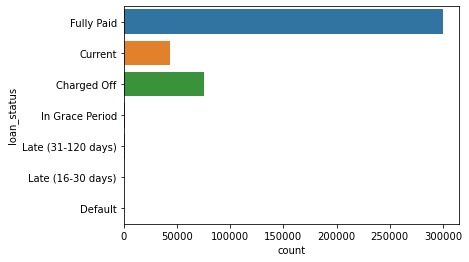

In [26]:
sns.countplot(y='loan_status', data=df_2015);

In [27]:
# for this machine learning model, lets assume the class is either fully paid or charged off. 
# so the model will predict whether the oan is fully paid or charged off only

status_df = df_2015[df_2015['loan_status'].isin(['Fully Paid', 'Charged Off'])].copy()

# turn to boolean
status_df['loan_status'] = np.where(status_df['loan_status']=='Fully Paid', 1, 0) 

In [28]:
# look at loan amount column
status_df.groupby('loan_status').describe().loan_amnt

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,75803.0,15726.254898,8449.937074,1000.0,9800.0,14925.0,20500.0,35000.0
1,299742.0,14367.252003,8519.161596,1000.0,8000.0,12000.0,20000.0,35000.0


In [29]:
# let's first see how numeric column relates to target column, since we are only using 10 features
status_df = status_df.select_dtypes(exclude=['object', 'datetime'])

In [30]:
status_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375545 entries, 0 to 421094
Data columns (total 72 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   loan_amnt                       375545 non-null  float64
 1   funded_amnt                     375545 non-null  float64
 2   funded_amnt_inv                 375545 non-null  float64
 3   int_rate                        375545 non-null  float64
 4   installment                     375545 non-null  float64
 5   annual_inc                      375545 non-null  float64
 6   loan_status                     375545 non-null  int32  
 7   dti                             375543 non-null  float64
 8   delinq_2yrs                     375545 non-null  float64
 9   fico_range_low                  375545 non-null  float64
 10  fico_range_high                 375545 non-null  float64
 11  inq_last_6mths                  375545 non-null  float64
 12  mths_since_last_

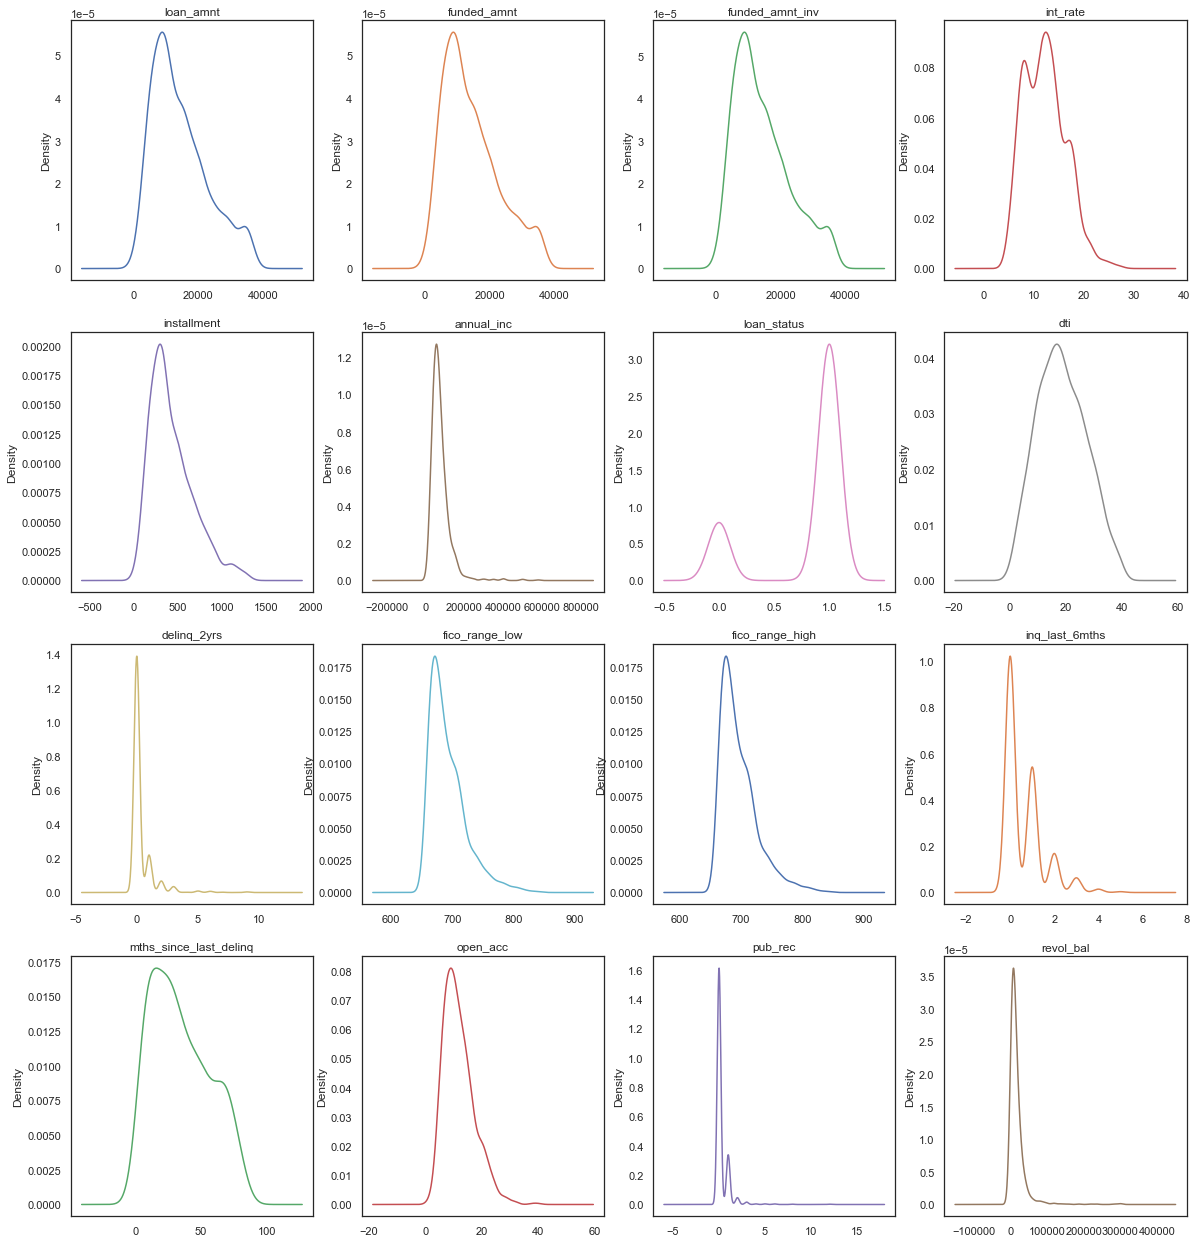

In [31]:
# let's take a look at some data distribution
sns.set(font_scale=1, style='white')
status_df.iloc[:,:16].sample(1000).plot(kind='density', subplots=True, layout=(4,4), legend=False,
                    sharex=False, figsize=(20,22), title=status_df.iloc[:,:16].columns.tolist());

In [38]:
# # correlation plot

# X = df[list(df.columns)[:]]

# corr = X.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True
# with sns.axes_style("white"):
#     plt.figure(figsize=(20, 15))
#     sns.heatmap(corr, vmax=1, square=True, cmap="YlGnBu", linecolor='black', mask=mask, annot=False, fmt = '.2f', 
#                 annot_kws={"size":9})
#     plt.yticks(rotation=0,fontsize=12)
#     plt.xticks(rotation=90,fontsize=12)
#     plt.title('Feature Correlation ',fontsize=20)
# #     plt.savefig('heatmap.png', format='png', dpi=600)
#     plt.show();

In [38]:
# we're only going to select 10 features at most, so we select features with highest correlation to target column
corr = status_df.iloc[:, :].corr()

In [39]:
# find feature correlated to late payment 

cor_dict = corr['loan_status'].to_dict()
del cor_dict['loan_status']
print("List the features in descending order of their correlation with loan_status:\n")
for ele in sorted(cor_dict.items(), key=lambda x: -abs(x[1])):
    print("{0}:   {1}".format(*ele))

List the features in descending order of their correlation with loan_status:

last_fico_range_high:   0.6705070566807999
last_fico_range_low:   0.5796688394715089
recoveries:   -0.5101747731026247
collection_recovery_fee:   -0.5074871105975491
total_rec_prncp:   0.43505531218628685
last_pymnt_amnt:   0.32666773253377307
total_pymnt_inv:   0.30346056970507584
total_pymnt:   0.30340896814934276
int_rate:   -0.2996264074242481
fico_range_low:   0.13086908348895251
fico_range_high:   0.1308679488724227
acc_open_past_24mths:   -0.1272555852504292
total_rec_late_fee:   -0.12581397018983995
dti:   -0.11412505762939433
num_tl_op_past_12m:   -0.10795602896758968
total_rec_int:   -0.08721633084029218
inq_last_6mths:   -0.0869630996608695
bc_open_to_buy:   0.08583680831260102
total_bc_limit:   0.07805198470798885
avg_cur_bal:   0.07767542124503583
tot_hi_cred_lim:   0.07547611522494636
num_rev_tl_bal_gt_0:   -0.07361846944284614
num_actv_rev_tl:   -0.07288828154596867
percent_bc_gt_75:   -0.06985

In [40]:
# select top 10 features from the above with highest correlation

high_cor = ['last_fico_range_high', 'last_fico_range_low',
            'recoveries', 'collection_recovery_fee', 
            'total_rec_prncp', 'last_pymnt_amnt',
            'total_pymnt', 'total_pymnt_inv',
            'int_rate', 'total_rec_late_fee']


In [41]:
# crate new dataframe for machine learning features only + target column

ml_df = status_df[high_cor].copy()
ml_df['loan_status'] = status_df['loan_status']

In [42]:
ml_df.loan_status.value_counts(normalize=True)

1    0.798152
0    0.201848
Name: loan_status, dtype: float64

In [43]:
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

In [44]:
X = ml_df.iloc[:, :-1]
y = ml_df[['loan_status']]

In [46]:
# split data for training and testing, and stratify the target column to make sure even distribution
# initialize random seed
rs = 24

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=rs, stratify=y)

In [53]:
# here, i chose to use random forest as classifier algorithm as it is very easy to use. 
# The algorithm is based on decision tree

clf = RandomForestClassifier(random_state=rs,
                             n_estimators=150,
                             max_depth=10,
                             min_samples_split=50 
                            )
clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=10, n_estimators=150, random_state=24)

In [54]:
# let see how the trained model performed on the train dataset first

preds = clf.predict(X_train)

val_accuracy = accuracy_score(y_train, preds)
val_roc_auc = roc_auc_score(y_train, preds)
val_confusion_matrix = confusion_matrix(y_train, preds)
print(f'Accuracy Score: {val_accuracy}')
print(f'ROC AUC Score: {val_roc_auc}')
print(f'Confusion Matrix: \n{val_confusion_matrix}')

Accuracy Score: 0.984811366976972
ROC AUC Score: 0.9705892755966967
Confusion Matrix: 
[[ 53824   3028]
 [  1250 223556]]


In [55]:
# here comes the truth. the model result on test dataset
test_preds = clf.predict(X_test)

test_accuracy = accuracy_score(y_test, test_preds)
test_roc_auc = roc_auc_score(y_test, test_preds)
test_confusion_matrix = confusion_matrix(y_test, test_preds)
print(f'Accuracy Score: {test_accuracy}')
print(f'ROC AUC Score: {test_roc_auc}')
print(f'Confusion Matrix: \n{test_confusion_matrix}')

Accuracy Score: 0.9837357674651442
ROC AUC Score: 0.9687988769500948
Confusion Matrix: 
[[17885  1066]
 [  461 74475]]


In [56]:
# let's save the model to be used in our flask app later

joblib.dump(clf, 'flask_app/data/rf_model.pkl')

['flask_app/data/rf_model.pkl']

#### Conclusion

1. The model do quite well to predict with >96% accuracy and ROC_auc, using basic model parameter tuning.
2. Further model optimization can be done using ensemble method, do some extensive feature selection but these processes take a long time to experiment. So there is a trade-off between the two approaches.
3. Feature selection can be improved by removing two features with high correlation to one another. For example last_fico_range_high and last_fico_range_low columns have a very high correlation to one another. Selecting only one of these can open up the feature to other columns that could improve the model further.

# Part 3: Model Deployment
Take the model from Part 2 and deploy it with Flask (or similar framework) in a docker. 
-	Prepare a readme.md to elaborate how your scripts work.
-	Show the docker script.
-	Show the integration of your model with Flask.
-	Show your test script, i.e., the script that call the Flask and get the response from the model. 
-	Devise a test script such that it will load all the test data from year 2018. Then, send the requests to Flask (correspond to the model). Store all the result in csv. 
-	Instead of having Flask handling the request one-by-one, how do you further increase the throughput of the prediction? Please state your assumptions. 


## >>> [Link to github repo](https://github.com/asyrafjanai/lending_club)

# Part 4: Model Performance
Filter the data set for year 2018. Apply the model from Part II to the data set of year 2018. Support your answer with hypothesis testing, evidence, or theories if possible.

1. How accurate is the prediction over the late payment? 
  - The model accuracy dropped a lot. My theory is because the data is changing. This is common scenario in data that varies greatly with external factors. Some example of external factors are human behaviour and natural phenomenons. MCO is another great example of this. For instance traffic data is heavily unreliable if we are comparing MCO period and pre-MCO period because most people can't travel as they wish.
1. Assume that you do not have the late payment information (column “loan_status”), how do you know your model is degrading or improving?
  - data drift. We can create data drift monitor by comparing the newer dataset with previous dataset. Setting alert in case data drifft is over the threshold, to make sure the model is retrain with the latest data trend included in the training process. refer to data compariosn below. Dat drift will negatively affect the model performance most of the time.
1. How many months/years of data we should take to build a model? Assume that you favour long data (e.g., 10 years), how do you train the model?
  - we can select all the dataset and do some stratified sampling to make sure we have the correct representation for each year
1. Assume that you favour a relatively short data (e.g., 3 months data), how do you ensure your model will capture the sudden change of population (e.g., MCO causes the economy collapse)? 
  - data drift monitor. let say the preset value is over/under the threshold, we need to retrain the model since current model will not produce accurate result when making prediction.


In [57]:
df_2018 = pd.read_csv('ml_2018.csv')

In [58]:
df_2018.head()

,last_fico_range_high,last_fico_range_low,recoveries,collection_recovery_fee,total_rec_prncp,last_pymnt_amnt,total_pymnt,total_pymnt_inv,int_rate,total_rec_late_fee,loan_status
0,609.0,605.0,0.0,0.0,1219.69,186.82,2043.690000,2043.69,20.39,0.0,0
1,694.0,690.0,0.0,0.0,4121.50,483.45,5301.420000,5301.42,9.92,0.0,0
2,629.0,625.0,0.0,0.0,1006.27,367.82,4007.700000,4007.70,30.79,0.0,0
3,669.0,665.0,0.0,0.0,2811.27,688.35,7511.160000,7511.16,21.85,0.0,0
4,764.0,760.0,0.0,0.0,3000.00,614.03,3011.577285,3011.58,7.34,0.0,1


In [59]:
preds = clf.predict(preds.iloc[:,:-1])

In [60]:
test_accuracy = accuracy_score(df_2018['loan_status'], preds)
test_roc_auc = roc_auc_score(df_2018['loan_status'], preds)
test_confusion_matrix = confusion_matrix(df_2018['loan_status'], preds)
print(f'Accuracy Score: {test_accuracy}')
print(f'ROC AUC Score: {test_roc_auc}')
print(f'Confusion Matrix: \n{test_confusion_matrix}')

Accuracy Score: 0.4080308212954475
ROC AUC Score: 0.6724863753661159
Confusion Matrix: 
[[154648 293150]
 [    18  47426]]


In [61]:
# let's do some quick comparison of the 2015 and 2018 data
df_2018.describe()

,last_fico_range_high,last_fico_range_low,recoveries,collection_recovery_fee,total_rec_prncp,last_pymnt_amnt,total_pymnt,total_pymnt_inv,int_rate,total_rec_late_fee,loan_status
count,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000
mean,709.383326,703.734084,9.942098,1.747514,3735.078047,1599.760632,4925.154778,4923.958198,12.729072,0.512806,0.095800
std,51.721311,64.672805,194.694939,34.576367,5241.807689,4596.678963,5582.696299,5581.731532,5.150204,5.864272,0.294317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.310000,0.000000,0.000000
25%,679.000000,675.000000,0.000000,0.000000,1114.860000,270.710000,1758.272500,1757.557500,8.460000,0.000000,0.000000
50%,709.000000,705.000000,0.000000,0.000000,2074.610000,436.930000,3221.060000,3220.740000,11.800000,0.000000,0.000000
75%,744.000000,740.000000,0.000000,0.000000,4000.000000,747.920000,5909.220000,5908.305000,16.010000,0.000000,0.000000
max,850.000000,845.000000,33122.070000,5961.972600,40000.000000,41353.670000,51653.389338,51653.390000,30.990000,458.570000,1.000000


In [63]:
ml_df.describe()

,last_fico_range_high,last_fico_range_low,recoveries,collection_recovery_fee,total_rec_prncp,last_pymnt_amnt,total_pymnt,total_pymnt_inv,int_rate,total_rec_late_fee,loan_status
count,375545.000000,375545.000000,375545.000000,375545.000000,375545.000000,375545.000000,375545.000000,375545.000000,375545.000000,3.755450e+05,375545.000000
mean,675.073530,657.675458,262.633292,46.873100,12461.621118,4737.392037,15188.469538,15182.639608,12.385183,1.705444e+00,0.798152
std,82.007741,133.773569,1023.674723,183.666456,8710.146926,6585.065601,10080.955386,10077.214053,4.315007,1.152658e+01,0.401380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.320000,-5.100000e-09,0.000000
25%,619.000000,615.000000,0.000000,0.000000,5600.000000,349.560000,7343.050001,7341.000000,9.170000,0.000000e+00,1.000000
50%,689.000000,685.000000,0.000000,0.000000,10000.000000,1129.070000,12682.100488,12676.360000,12.290000,0.000000e+00,1.000000
75%,734.000000,730.000000,0.000000,0.000000,18000.000000,7193.060000,21055.104062,21048.320000,14.990000,0.000000e+00,1.000000
max,850.000000,845.000000,35581.880000,6404.738400,35000.000000,36475.590000,61184.573797,61184.570000,28.990000,1.098360e+03,1.000000


#### Some quick data distribution check, we can clearly see the difference in the data.

1. Loan is approved a lot more in 2015, with the mean of 0.789, compared to 0.0956 in 2018
2. average fico score is is lower in 2018 than 2015
3. last payment and total payment amount also shows some huge difference between the two years